# An example using Feature weighted ECM clustering


In [20]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from evclust.datasets import load_letters


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


LettersIJL DS: 227 instances, 16 features


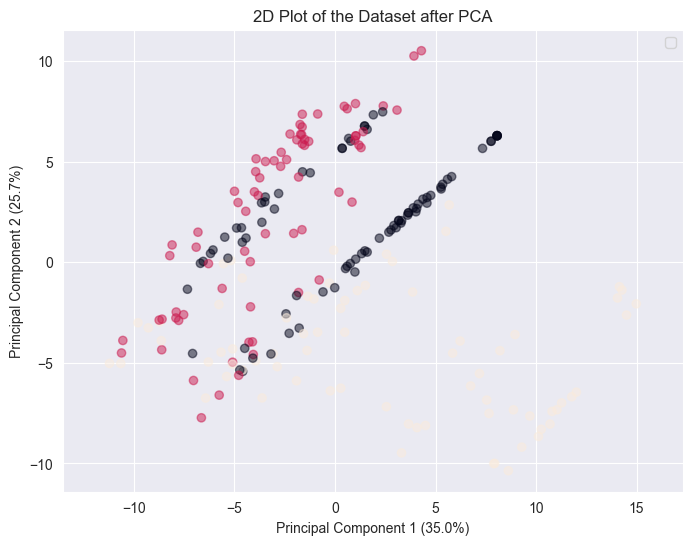

In [21]:
# fetch dataset
df = load_letters()

# data (as pandas dataframes)
y = pd.DataFrame(df.iloc[:, -1])
X = df.iloc[:, :-1]

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['class'])

# Scatter matrix plot
# sns.pairplot(df, corner=True, hue="class")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

print(f"LettersIJL DS: {X.shape[0]} instances, {X.shape[1]} features")
# Plot the reduced dataset with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=numeric_labels)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# Normalization
scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))

In [3]:
# Non-specificity values
def calculate_non_specificity(cluster_model):
    m = cluster_model['mass']
    F = cluster_model['F']
    c = F.shape[1]
    card = np.sum(F[1:F.shape[0], :], axis=1)

    log_card = np.log2(card)
    tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
    m_log_card = m[:, :-1] * tmp

    mvide = m[:, -1][:, np.newaxis]
    tmp2 = mvide * np.log2(c)
    tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

    non_specificity = m_log_card + tmp3
    object_non_specificity = np.sum(non_specificity, axis=1)

    print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
    print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
    print(f"Average Non-specificity value: {np.mean(object_non_specificity)}")
    # Plot the values
    # plt.clf()
    # plt.hist(object_non_specificity, bins=30, density=True, alpha=0.7, color='blue')
    # plt.xlabel('Value')
    # plt.ylabel('Density')
    # plt.title('Non-specificity Value Distribution Plot')
    # plt.grid(True)
    # plt.show()

## Traditional ECM

[1, 37.625234230680555]
[2, 36.870379510667114]
[3, 36.72040226795201]
[4, 36.64902391540833]
[5, 36.603697509179185]
[6, 36.570295013632375]
[7, 36.54378320817941]
[8, 36.52201471133264]
[9, 36.503907885671154]
[10, 36.48881742750376]
[11, 36.47629127301045]
[12, 36.46597008531064]
[13, 36.457544552734305]
[14, 36.45073767395123]
[15, 36.44529822553097]
[16, 36.440999160376286]
[17, 36.437637872401794]
[18, 36.43503673190018]
[19, 36.43304308696741]
[20, 36.431528423216676]
[21, 36.43038669689841]
[22, 36.429532041167896]
[ 0.         36.42953204 36.42953204]
[1, 37.62523423068055]
[2, 36.870379510667114]
[3, 36.72040226795201]
[4, 36.64902391540833]
[5, 36.603697509179185]
[6, 36.57029501363237]
[7, 36.54378320817941]
[8, 36.522014711332645]
[9, 36.503907885671154]
[10, 36.488817427503754]
[11, 36.47629127301045]
[12, 36.465970085310644]
[13, 36.457544552734305]
[14, 36.45073767395123]
[15, 36.44529822553097]
[16, 36.44099916037629]
[17, 36.437637872401794]
[18, 36.43503673190018]
[1

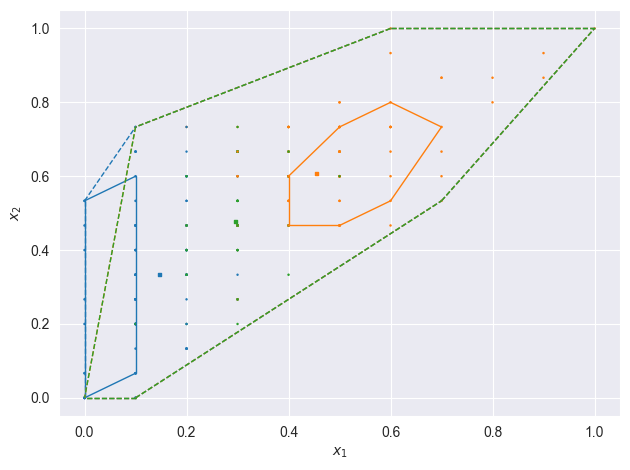

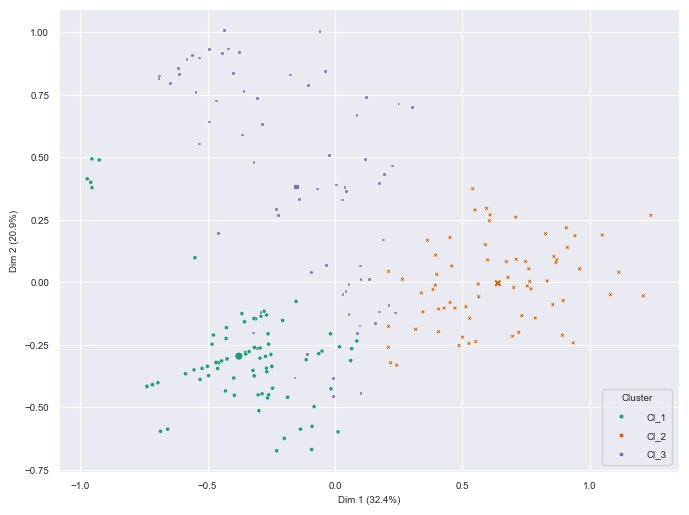

----------Traditional ECM----------
Adjusted Rand Index (ARI): 0.1842641242354113
Maximum Non-specificity value: 1.6866111990108519
Minimum Non-specificity value: 0.9111787930280063
Average Non-specificity value: 1.4290552516163164


In [22]:
# Traditional ECM clustering
model = ecm(x=X, c=3, beta=2, alpha=1, delta=100, ntrials=10)

ev_plot(model, X=X)
ev_pcaplot(data=X, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

## Feature weighted ECM (FW-ECM)

In [23]:
# Feature weighted ECM clustering
c = 3
d = X.shape[1]
W = np.ones((c, d)) * (1/d)
# W = np.random.dirichlet(np.ones(X.shape[1]), c)
model = fwecm(x=X, c=c, W=W, beta=2, alpha=1, delta=100, ntrials=10)

Initial weight matrix: 
 [[0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
  0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
  0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
  0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]]
[1, 0.14697908399919896]
[2, 0.13913456237542102]
[3, 0.13476199060746152]
[4, 0.1313561926351411]
[5, 0.12851935688472407]
[6, 0.1260727596349829]
[7, 0.12390825360268416]
[8, 0.1219563105690216]
[9, 0.12017254649984298]
[10, 0.11852865625961785]
[11, 0.11700672741706057]
[12, 0.11559584311661963]
[13, 0.11428970481999937]
[14, 0.11308470387439491]
[15, 0.11197835049952667]
[16, 0.11096809326511327]
[17, 0.11005055446384161]
[18, 0.10922117126921756]
[19, 0.10847418791107967]
[20, 0.1078029024546377]
[21, 0.10720005029121471]
[22, 0.10665821383609132]
[23, 0.10617017827521141]
[0.         0.10617018 0.10617018]
Ini

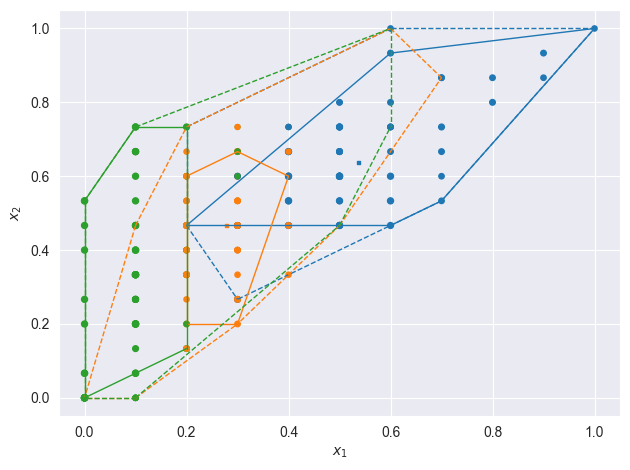

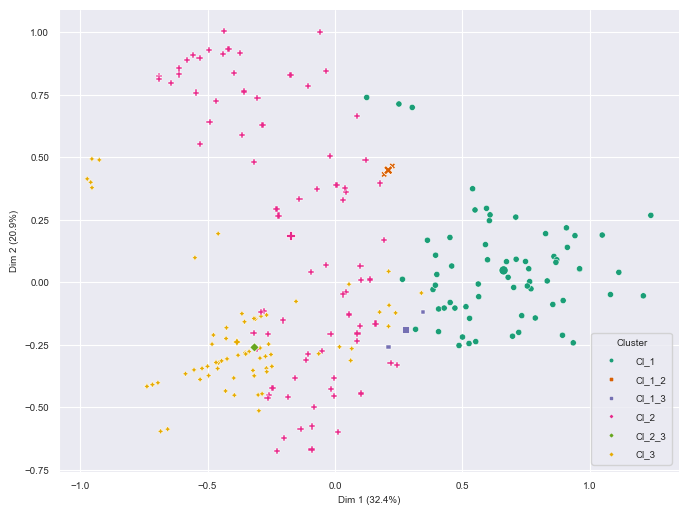

Weight matrix: 
 [[0.07605233 0.08501272 0.07980208 0.11084278 0.0505481  0.12547975
  0.05783084 0.09277442 0.05215051 0.05012834 0.05328927 0.04031848
  0.02976932 0.03313691 0.02648638 0.03637777]
 [0.11880935 0.06351847 0.08419695 0.0967656  0.10090225 0.01381586
  0.04353479 0.02415757 0.02905225 0.010398   0.01595322 0.02349704
  0.1270877  0.05519076 0.097491   0.09562919]
 [0.08135411 0.01343307 0.03513849 0.02116739 0.07789724 0.07264843
  0.0609968  0.02629409 0.01604525 0.02089424 0.04224021 0.07376638
  0.14250122 0.0861215  0.07916905 0.15033253]]
Centers: 
 [[0.53777368 0.63646706 0.6905799  0.60034136 0.62868047 0.53807522
  0.61566716 0.30378546 0.48210136 0.58835567 0.72454031 0.41959041
  0.41377627 0.57588131 0.60391591 0.42980299]
 [0.27805746 0.46658502 0.40928723 0.41691122 0.21061186 0.49745433
  0.30018229 0.35304475 0.5951861  0.57316143 0.3345772  0.48206144
  0.05304419 0.39167198 0.07713395 0.30582702]
 [0.09694314 0.33425297 0.12459332 0.2972103  0.07166515

In [24]:
ev_plot(model, X=X, cex=20)
ev_pcaplot(data=X, x=model, normalize=False, cex=20)

true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

W = model['W']
print(f"Weight matrix: \n {W}")
print(f"Centers: \n {model['g']}")

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Feature weighted ECM----------")
print(f"Adjusted Rand Index (ARI): {ari} - J value: {model['crit']}")

# Calculate Non-specificity
calculate_non_specificity(model)